In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [3]:

#Since we would be using these names a lot let us keep shorter names with no capital letters or spaces

df = df.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'furnace_slag', 
    'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'water', 
    
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'super_plasticizer', 
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_agg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_agg', 
    'Age (day)':'age', 
    'Concrete compressive strength(MPa, megapascals) ': 'strength'})

df.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'strength'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement               1030 non-null float64
furnace_slag         1030 non-null float64
fly_ash              1030 non-null float64
water                1030 non-null float64
super_plasticizer    1030 non-null float64
coarse_agg           1030 non-null float64
fine_agg             1030 non-null float64
age                  1030 non-null int64
strength             1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.describe()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
#check for nulls

print(df.isnull().sum())

cement               0
furnace_slag         0
fly_ash              0
water                0
super_plasticizer    0
coarse_agg           0
fine_agg             0
age                  0
strength             0
dtype: int64


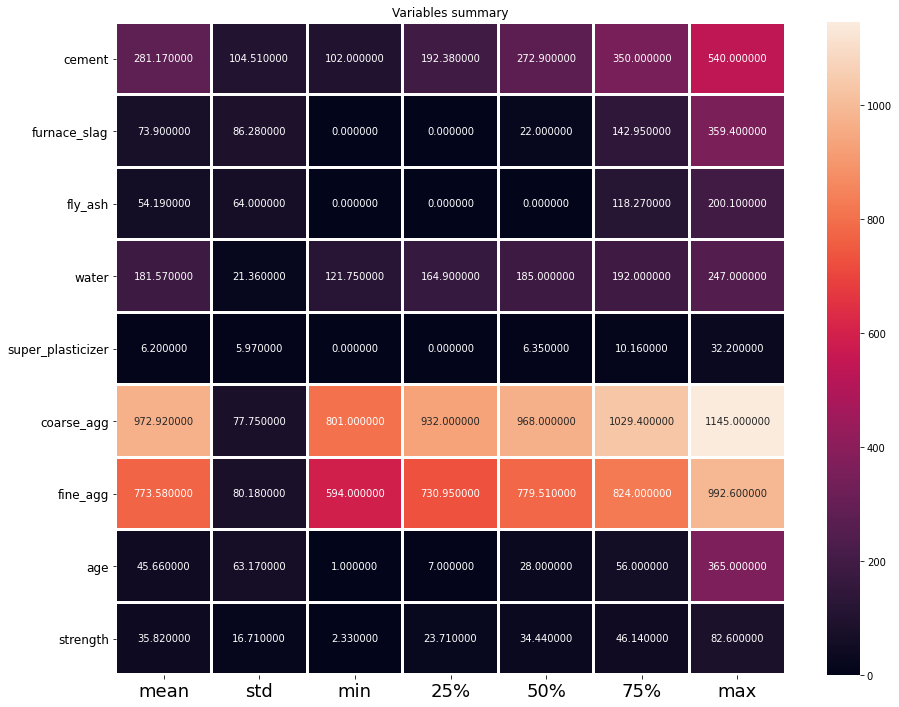

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

<AxesSubplot:xlabel='strength', ylabel='Density'>

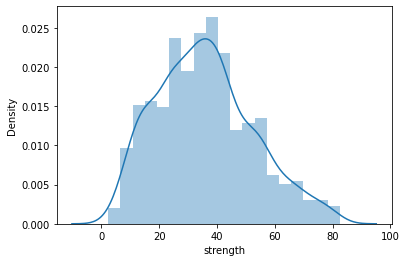

In [10]:
sns.distplot(df['strength'])

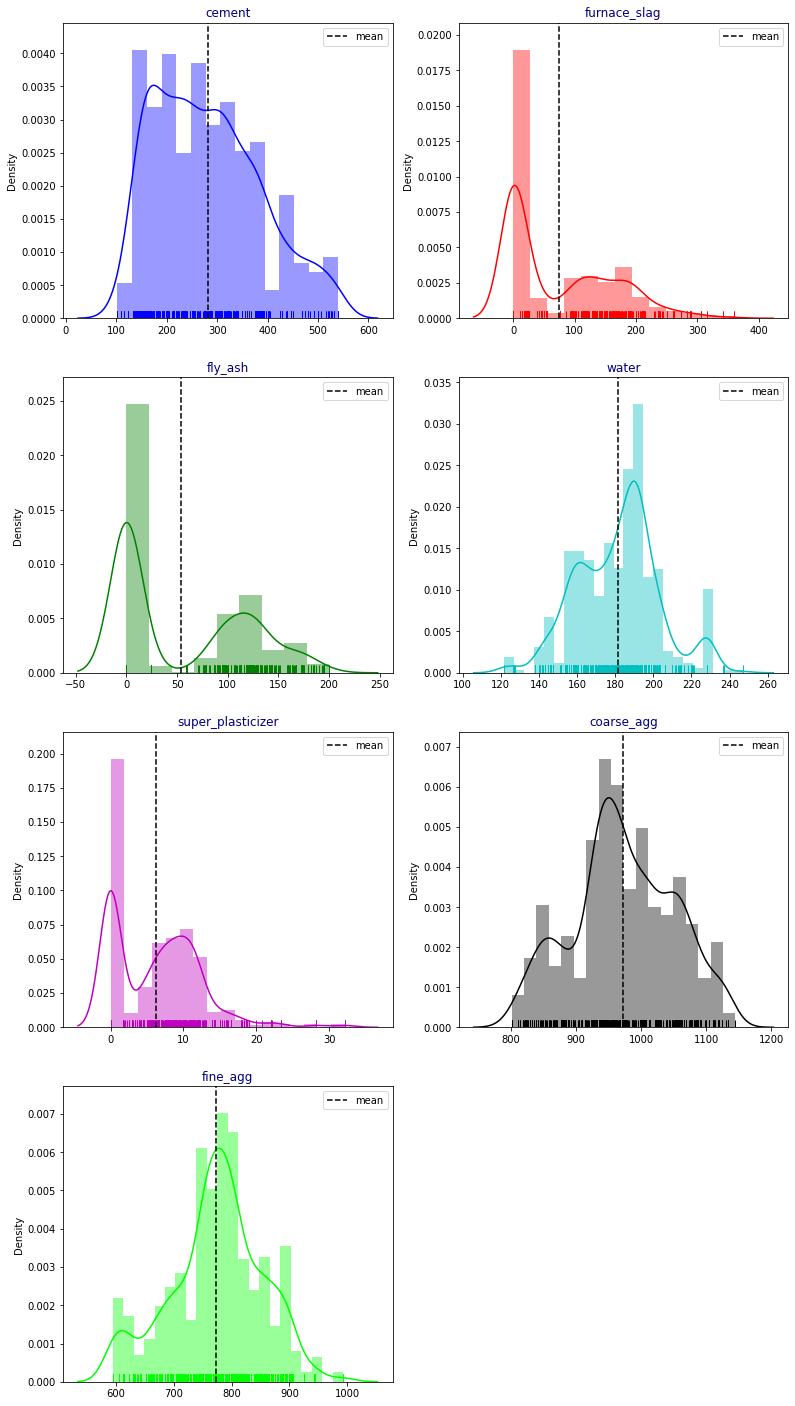

In [11]:
import itertools

cols = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

<AxesSubplot:>

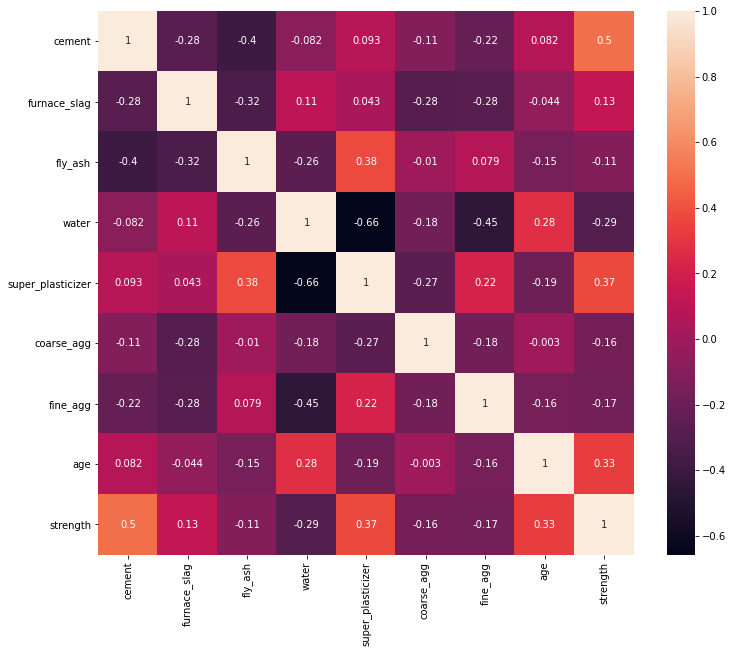

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

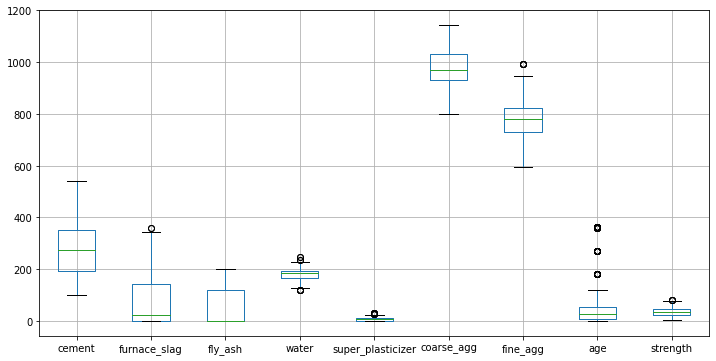

In [13]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.show()

In [14]:
df.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [15]:
df['furnace_slag'] = df['furnace_slag'].replace((0.0),np.nan)
df['furnace_slag'] = df['furnace_slag'].fillna(df['furnace_slag'].median())
df['fly_ash'] = df['fly_ash'].replace((0.0),np.nan)
df['fly_ash'] = df['fly_ash'].fillna(df['fly_ash'].median())
df.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
0,540.0,133.85,121.35,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,133.85,121.35,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.50,121.35,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.50,121.35,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.40,121.35,192.0,0.0,978.4,825.5,360,44.296075


### Split

In [16]:
X = df.drop('strength',axis=1)
y = df['strength']

In [17]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_scaled = sc.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

### Linear regrssion

In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

#Predicting the train set results
y_pred_lr = lr.predict(X_train_scaled)
score = r2_score(y_train,y_pred_lr)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_lr)))

#test set

y_test_pred_lr = lr.predict(X_test_scaled)
#r2 Score
score = r2_score(y_test,y_test_pred_lr)
print("Score of Testing:",100*score)
#RMSE
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lr)))
#MAE
print("Mean Absolute Error",mean_absolute_error(y_test,y_test_pred_lr))

Score of Training: 60.04136302790235
RMSE : 10.562420531943168
Score of Testing: 56.53270252456297
RMSE :  10.979930071179021
Mean Absolute Error 8.744344959322133


In [22]:
feature = [[332.5,142.5,0.0,228.0,0.0,932.0,594.0,270]]
feature = sc.fit_transform(feature)
pred = lr.predict(feature)
pred

array([35.97125511])

### LGBM

In [23]:
from lightgbm import LGBMRegressor
lgm = LGBMRegressor(n_estimators=500)
lgm.fit(X_train,y_train)

#Predicting the Test set results
y_pred_lgm = lgm.predict(X_train)
score = r2_score(y_train,y_pred_lgm)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_lgm)))
y_test_pred_lgm = lgm.predict(X_test)
#r2 Score
score = r2_score(y_test,y_test_pred_lgm)
print("Score of Testing:",100*score)
#RMSE
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lgm)))
#MAE
print("Mean Absolute Error",mean_absolute_error(y_test,y_test_pred_lgm))

Score of Training: 99.34233599593303
RMSE : 1.3550650929576
Score of Testing: 92.6204176262267
RMSE :  4.524120324222672
Mean Absolute Error 2.6776176557203595


In [24]:
feature = [[332.5,142.5,0.0,228.0,0.0,932.0,594.0,270]]
# feature_scale = sc.fit_transform(feature)
pred = lgm.predict(feature)
pred

array([40.93262521])

In [25]:
#dumb file
import pickle
filename = 'cc_strength.pkl'
pickle.dump(lgm, open(filename, 'wb'))

In [26]:
#open file
model = open("cc_strength.pkl","rb")
model = pickle.load(model)

In [27]:
model.predict(feature)

array([40.93262521])